In [25]:
%matplotlib inline
from __future__ import division
from pickle import load
import networkx as nx
import matplotlib.pyplot as plt
import numpy as np
from operator import itemgetter
from sklearn.cluster import KMeans
from itertools import permutations
from math import log
#import community

In [26]:
A,ids,G,L,N,evals,Probs = load(open('graph+20.p','r'))

In [27]:
etiqs = {y:x.decode('utf-8') for x,y in ids.iteritems()}
pos = nx.spring_layout(G)

In [28]:
def plot_words(Z,ids):
    import matplotlib.pyplot as plt
    r=0
    plt.scatter(Z[:,0],Z[:,1], marker='o', c='blue')
    for label,x,y in zip(ids, Z[:,0], Z[:,1]):
        plt.annotate(label.decode('utf8'), xy=(x,y), xytext=(-1,1), textcoords='offset points', ha='center', va='bottom')
        r+=1
    plt.show()

In [29]:
def log2(x):
    if x == 0:
        return 0.0
    else:
        return log(x,2)

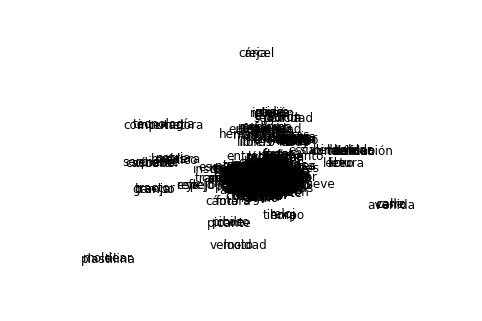

Grupo: 1
	Number of nodes: 7
	Secon smallest eigenvalue: 10.9700583395
	Diameter: 5
	Connectivity: 35.0
	Entropy: 0.66097494788
	Strength: 0.6


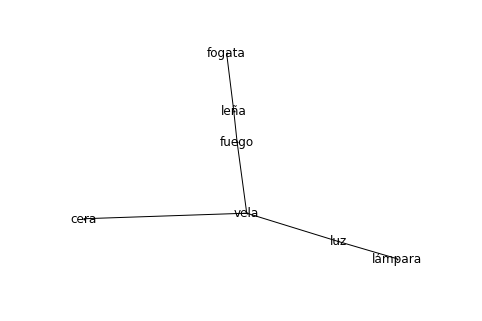

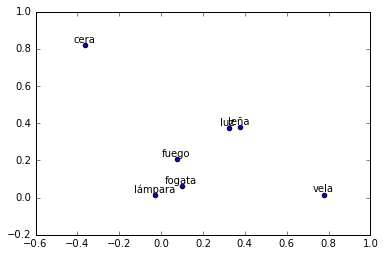

Grupo: 2
	Number of nodes: 3
	Secon smallest eigenvalue: 28.4868451412
	Diameter: 2
	Connectivity: 42.0
	Entropy: 0.499888983606
	Strength: -1.0


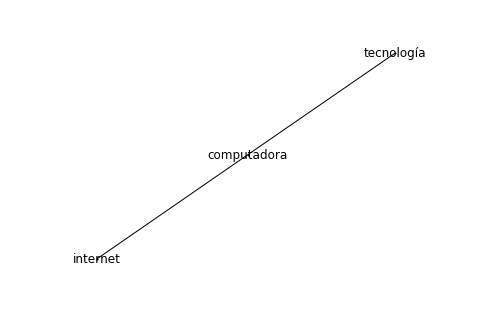

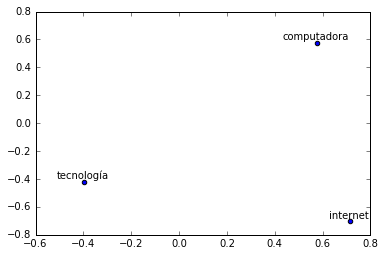

Grupo: 3
	Number of nodes: 3
	Secon smallest eigenvalue: 35.5025773881
	Diameter: 2
	Connectivity: 42.0
	Entropy: 0.459147917027
	Strength: -1.0


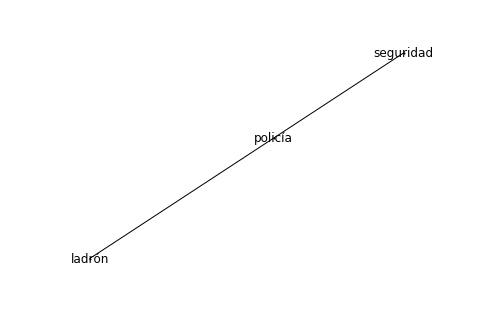

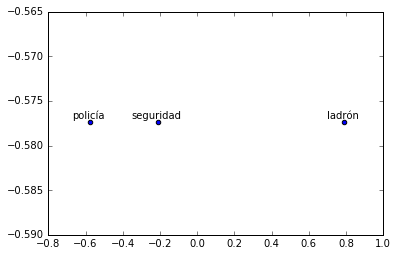

Grupo: 4
	Number of nodes: 3
	Secon smallest eigenvalue: 26.7136383299
	Diameter: 2
	Connectivity: 30.0
	Entropy: 0.420926094878
	Strength: -1.0


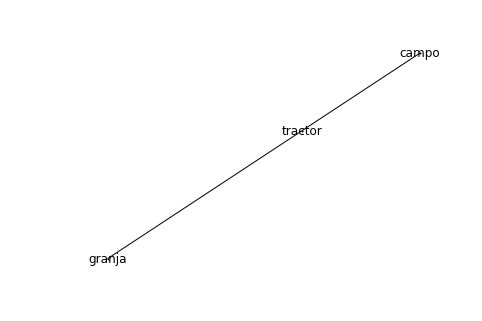

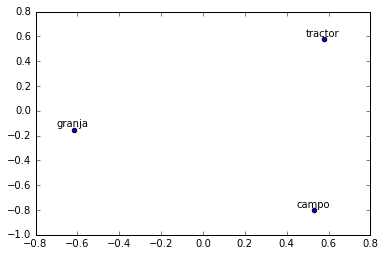

Grupo: 6
	Number of nodes: 3
	Secon smallest eigenvalue: 124.472894517
	Diameter: 2
	Connectivity: 184.5
	Entropy: 0.499947643709
	Strength: -1.0


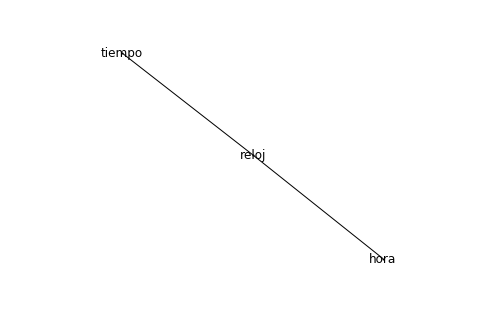

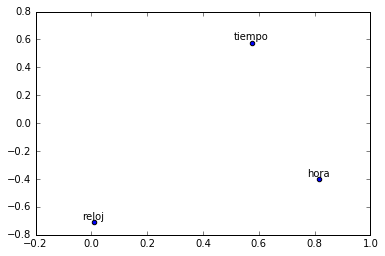

Grupo: 7
	Number of nodes: 6
	Secon smallest eigenvalue: 27.3964494582
	Diameter: 2
	Connectivity: 31.2
	Entropy: 1.14723939456
	Strength: 0.6


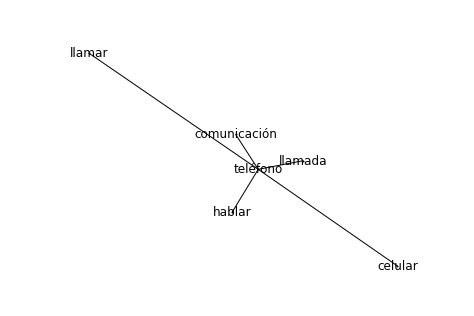

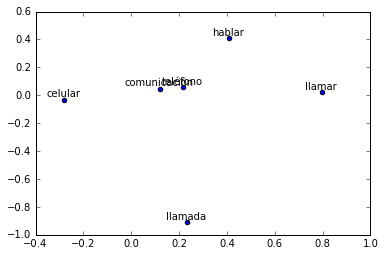

Grupo: 8
	Number of nodes: 4
	Secon smallest eigenvalue: 24.9123441075
	Diameter: 2
	Connectivity: 32.0
	Entropy: 0.65563422824
	Strength: 0.666666666667


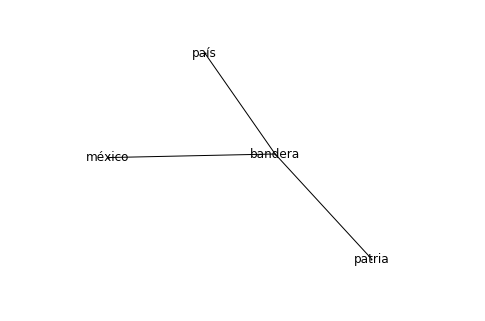

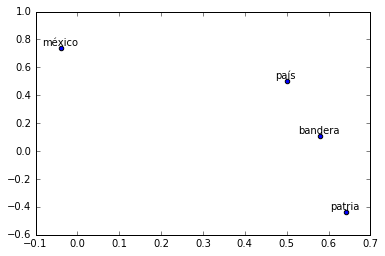

Grupo: 9
	Number of nodes: 8
	Secon smallest eigenvalue: 21.3023696744
	Diameter: 3
	Connectivity: 27.4285714286
	Entropy: 1.2542904071
	Strength: 0.235294117647


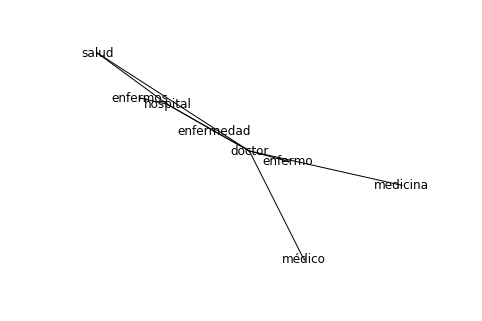

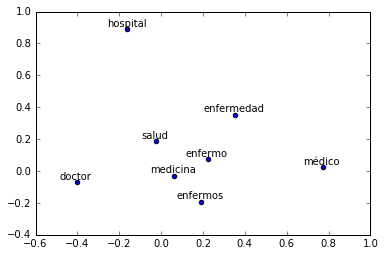

Grupo: 11
	Number of nodes: 3
	Secon smallest eigenvalue: 40.6567759053
	Diameter: 2
	Connectivity: 43.5
	Entropy: 0.350256694723
	Strength: -1.0


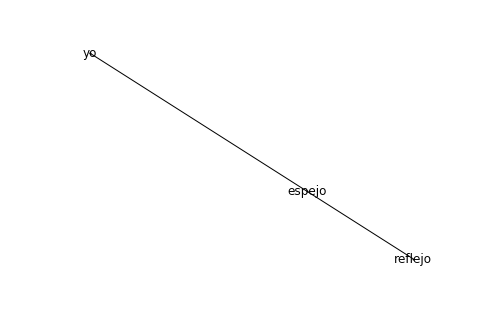

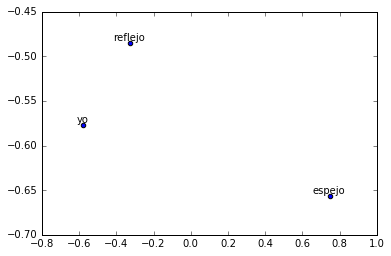

Grupo: 13
	Number of nodes: 4
	Secon smallest eigenvalue: 24.5941396333
	Diameter: 2
	Connectivity: 30.6666666667
	Entropy: 0.760942136363
	Strength: 2.0


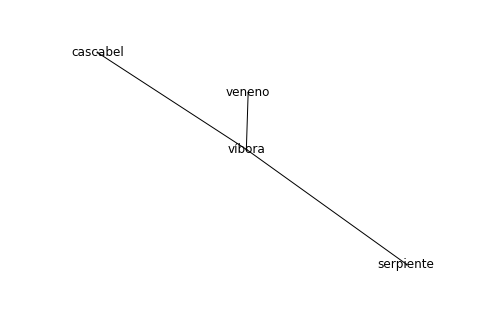

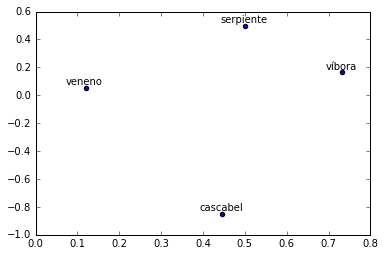

Grupo: 14
	Number of nodes: 3
	Secon smallest eigenvalue: 30.1786981469
	Diameter: 2
	Connectivity: 31.5
	Entropy: 0.28498068802
	Strength: -1.0


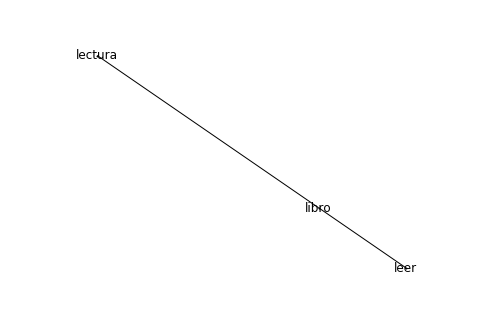

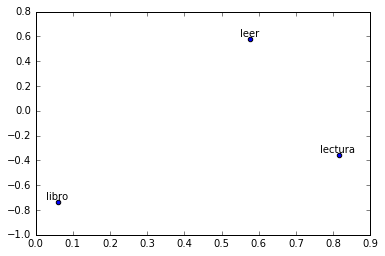

Grupo: 15
	Number of nodes: 14
	Secon smallest eigenvalue: 7.46436215347
	Diameter: 6
	Connectivity: 21.5384615385
	Entropy: 1.11373506911
	Strength: 0.259259259259


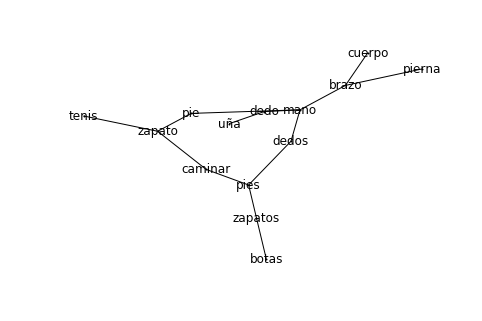

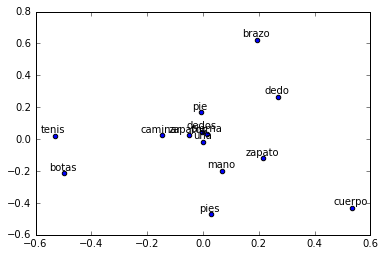

Grupo: 16
	Number of nodes: 3
	Secon smallest eigenvalue: 35.4534725749
	Diameter: 2
	Connectivity: 37.5
	Entropy: 0.323726624281
	Strength: -1.0


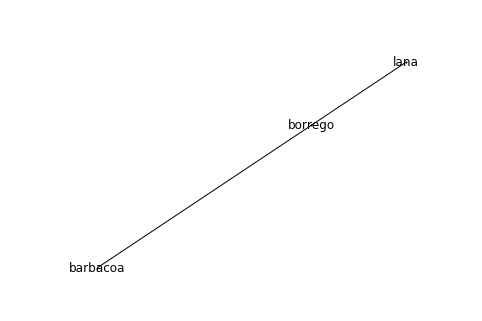

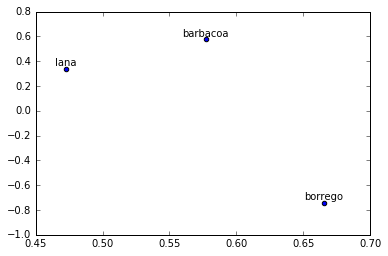

Grupo: 17
	Number of nodes: 5
	Secon smallest eigenvalue: 22.0935165453
	Diameter: 2
	Connectivity: 26.25
	Entropy: 0.958528533719
	Strength: 0.4


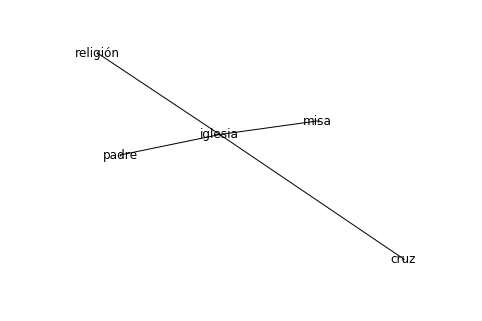

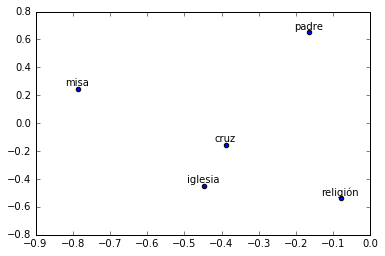

Grupo: 18
	Number of nodes: 3
	Secon smallest eigenvalue: 27.1611781858
	Diameter: 2
	Connectivity: 37.5
	Entropy: 0.497015105738
	Strength: -1.0


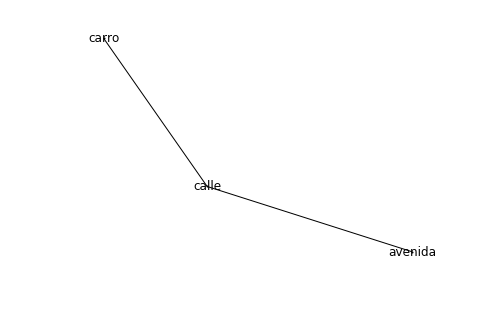

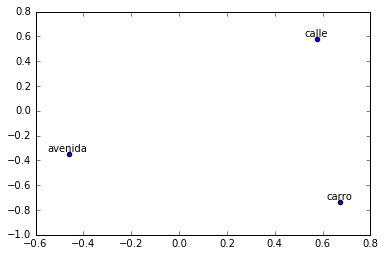

Grupo: 19
	Number of nodes: 3
	Secon smallest eigenvalue: 59.0765050178
	Diameter: 2
	Connectivity: 69.0
	Entropy: 0.451888144117
	Strength: -1.0


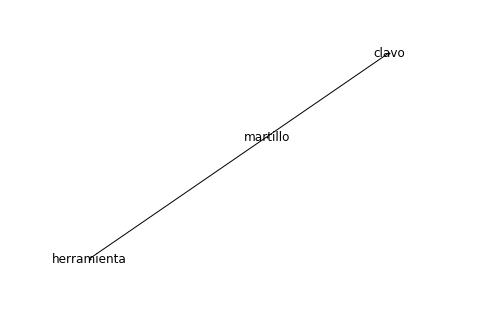

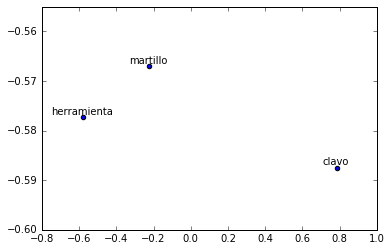

Grupo: 22
	Number of nodes: 3
	Secon smallest eigenvalue: 62.7469298907
	Diameter: 2
	Connectivity: 79.5
	Entropy: 0.484135511925
	Strength: -1.0


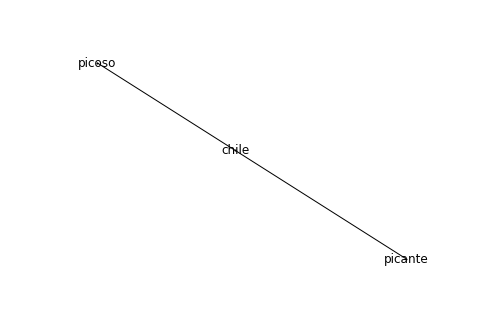

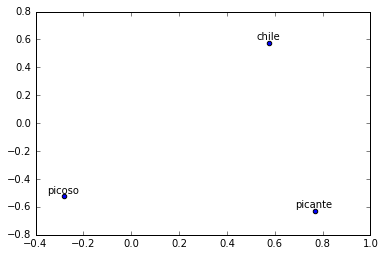

In [30]:
import networkx as nx
from itertools import combinations
from math import log

#nx.draw(G,pos,labels=etiqs,node_size=0,with_labels=True)
nx.draw(G,labels=etiqs,with_labels=True,node_size=1)
plt.show()

for i,c in enumerate(list(nx.connected_components(G))):   
    
    if len(c) > 2 and len(c) < 100:
        print 'Grupo:', i
        
        sub = []
        for w in c:
            word = etiqs[w]
            
        for x,y in combinations(c,2):
            w1 = etiqs[x]
            w2 = etiqs[y]
            if A[x,y] != 0.0:
                sub.append((x,y,A[x,y]))
            
            #print '\t',w1,w2,P[x,y]
                
        dico = {}
        for x in c:
            dico[x] = etiqs[x]
            
        G1 = nx.Graph()
        G1.add_weighted_edges_from(sub)

        
        n = len(c)
        #print '\tAlgebraic connectivity:', 1/(len(c)*nx.diameter(G1))
     
        A1 = np.array(nx.to_numpy_matrix(G1))
        L1 = np.diag(A1.sum(1)) - A1
        l, v = np.linalg.eig(L1)
        eig = sorted({l[i]:v[i] for i in range(len(l))}.iteritems(), key = itemgetter(0))
        print '\tNumber of nodes:', len(c)
        print '\tSecon smallest eigenvalue:', eig[1][0]
        print '\tDiameter:', nx.diameter(G1)
        print '\tConnectivity:', n/(n-1)*min(np.diag(L1)) 
        
        labs = [list(ids.keys())[list(ids.values()).index(x)] for x in dico.keys()]
        U = np.array([x[1] for x in eig][1:3]).T
        
        
        H = 0.0
        Mu = A1.sum(1)*(1/np.sum(A1))
        for a,mu in zip(A1,Mu):
            P = 0.0
            for p_ij in a*(1/sum(a)):
                P += p_ij*log2(p_ij)
            H -= mu*P
            
        print '\tEntropy:', H
        
        
        #Strenght
        from sklearn.cluster import KMeans
        from collections import defaultdict
        
        clusts = defaultdict(list)
        clust = KMeans(n_clusters= int(len(c)/2))        
        clust.fit(U)
        for x,y in zip(clust.labels_,c):
            clusts[x].append(y)
        
        s = 0
        for pi in clusts.values():
            s += len(nx.edge_boundary(G1,pi))
        print '\tStrength:', len(clusts)/(s-1)
        
        

        #print '\tProbability of transitions:'
        #for x,y in combinations(c,2):            
        #    print '\t\t',etiqs[x],etiqs[y],':',Probs[x,y]
        
        nx.draw(G1,labels=dico,with_labels=True,node_size=1)
        plt.show()
        plot_words( U, labs)
        
        

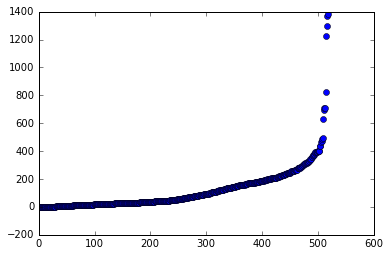

In [31]:
plt.plot(sorted(evals),'o')
plt.show()